<a href="https://colab.research.google.com/github/marianatmatos/estudos/blob/main/Exibindo_porcentagem_dentro_de_bar_charts_MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time

In [ ]:
# Create dataframe
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [ ]:
# See dataframe
df.head()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Em geral, usamos `ax.annotate()` para adicionar anotações aos gráficos.
Este método pega o valor do texto da anotação, as coordenadas xy e coloca a anotação.

Em um gráfico de barras, cada barra é representada por um `patch.Retangle` onde cada um desses retangulos tem os atributos `width`, `height` e as coordenadas `xy` que podem ser acessados pelos métodos `get_width`, `get_height` e `get_xy` respectivamente.

Juntando tudo isso podemos criar um loop que passa por cada retangulo do nosso `ax` e definir a porcentagem para ser a altura do retangulo, com uma posição xy que está logo acima do centro do retangulo (`x + width/2, y + height*02`) - calculado a partir de sua altura, largura e xy.

note: You can adjust the number thats multipling the height in this equation  to fit in your bar. `x + width/2, y + height*`**1.02**




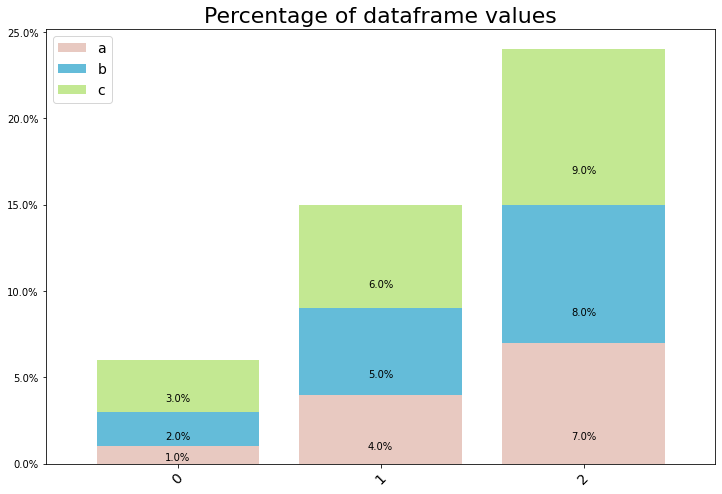

In [ ]:
colors = ['#E8C9C1','#64BCD9','#C3E892']

# Create ax objetct
fig, ax = plt.subplots()
df.plot(kind='bar', figsize=(12,8), width=0.8, color=colors, stacked = True, rot = 45, ax=ax)

# Customize
plt.title('Percentage of dataframe values', fontsize=22)
plt.legend(labels=df.columns, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# loop to add the percentage
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

Referencias:

* [MatplotLib Tics](https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm#:~:text=Ticks%20are%20the%20markers%20denoting,sufficient%20in%20many%20common%20situations.)


* [patch.Retangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)